In [ ]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten , Input # type: ignore
import matplotlib.pyplot as plt


In [52]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

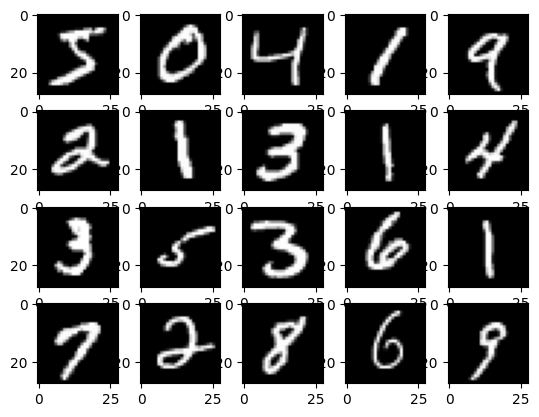

In [53]:
for i in range(20):
    plt.subplot(4, 5, i + 1) 
    plt.imshow(X_train[i], cmap='gray')

In [54]:
X_train=X_train/255
X_test=X_test/255

In [55]:
X_train[0].shape

(28, 28)

In [56]:
model = Sequential([
    Input(shape=(28, 28)),  
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10, activation='softmax')
])

In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [59]:
model.fit(X_train,y_train,epochs=100,validation_split=0.33)

Epoch 1/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5380 - val_loss: 0.1590
Epoch 2/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1351 - val_loss: 0.1418
Epoch 3/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0858 - val_loss: 0.1180
Epoch 4/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0609 - val_loss: 0.1176
Epoch 5/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0455 - val_loss: 0.1140
Epoch 6/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0351 - val_loss: 0.1167
Epoch 7/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0308 - val_loss: 0.1165
Epoch 8/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0227 - val_loss: 0.1313
Epoch 9/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0242 - val_loss: 0.1455
Epoch 10/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0225 - val_loss: 0.1238
Epoch 11/100
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0195 - val_loss: 0.1351
Epoch 12/100
1257/1

In [60]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9759
